# Dataset Description

In [1]:
import pandas as pd
import json
from datetime import date
from IPython.display import Markdown as md
from parallel_pandas import ParallelPandas
from multiprocessing import cpu_count
import geopandas as gpd
#initialize parallel-pandas
ParallelPandas.initialize(n_cpu=cpu_count()-1, split_factor=10, disable_pr_bar=False)

/home/jovyan/envs/giroe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('giroe.csv')
df['session']=pd.to_datetime(df.session)

In [3]:
df['date']=df.session.dt.date

## Stages

In [4]:
[str(d) for d in df.date.unique()]

['2024-05-04',
 '2024-05-05',
 '2024-05-06',
 '2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-11',
 '2024-05-12',
 '2024-05-14',
 '2024-05-15',
 '2024-05-16',
 '2024-05-17',
 '2024-05-18',
 '2024-05-19',
 '2024-05-21',
 '2024-05-22',
 '2024-05-23',
 '2024-05-24',
 '2024-05-26']

In [5]:
X=len(df.device.unique())
Y=len(df.session.dt.day.unique())
print(f"The dataset contains data recorded by sensors onboard {X} Garmin Fenix S7 during {Y} stages of the GiroE 2024 Cycling competition. ")

The dataset contains data recorded by sensors onboard 9 Garmin Fenix S7 during 20 stages of the GiroE 2024 Cycling competition. 


For each stage the number of active smartwatch is the following:

In [6]:
df.groupby('date').device.unique()#.apply(lambda x: len(x))

date
2024-05-04                      [4595, 4493, 4526]
2024-05-05    [4530, 4141, 4595, 4642, 4253, 3818]
2024-05-06                      [4155, 4493, 4526]
2024-05-07                [4530, 4141, 4253, 3818]
2024-05-08                      [4595, 4642, 4526]
2024-05-09                            [4253, 3818]
2024-05-10                                  [4530]
2024-05-11                            [4141, 4253]
2024-05-12                      [4530, 4155, 3818]
2024-05-14                            [4253, 4526]
2024-05-15                [4155, 4595, 4642, 4493]
2024-05-16                            [4253, 4493]
2024-05-17                      [4155, 4141, 4642]
2024-05-18                [4642, 4253, 4493, 4526]
2024-05-19    [4530, 4155, 4141, 4595, 4642, 3818]
2024-05-21                [4595, 4253, 4493, 4526]
2024-05-22                [4530, 4141, 4642, 3818]
2024-05-23    [4530, 4141, 4595, 4253, 4493, 4526]
2024-05-24                      [4155, 4642, 4253]
2024-05-26    [4530, 4141,

In [7]:
s="Each recording from a smartwatch, nominally, contains the following measures: \n"
l=[s]
for c in df.columns:
    l.append(f"* {c}")

md('\n'.join(l))

Each recording from a smartwatch, nominally, contains the following measures: 

* device
* session
* timestamp
* position_lat
* position_long
* distance
* enhanced_altitude
* heart_rate
* SystemBattery
* PositionLatitude
* PositionLongitude
* PositionAltitude
* PositionSpeed
* PositionHeading
* PositionAccuracy
* SensorAltitude
* SensorSpeed
* SensorHeading
* SensorPressure
* SensorAccelerationX_HD
* SensorAccelerationY_HD
* SensorAccelerationZ_HD
* SensorHeartrate
* SensorTemperature
* enhanced_speed
* date

Each device, for each stage, has recoded the following number of samples

In [8]:
session_count=df.groupby(['session','device']).count()
session_count.to_csv('samples_count.csv')
session_count

,,timestamp,position_lat,position_long,distance,enhanced_altitude,heart_rate,SystemBattery,PositionLatitude,PositionLongitude,PositionAltitude,...,SensorSpeed,SensorHeading,SensorPressure,SensorAccelerationX_HD,SensorAccelerationY_HD,SensorAccelerationZ_HD,SensorHeartrate,SensorTemperature,enhanced_speed,date
session,device,,,,,,,,,,,,,,,,,,,,,
2024-05-04 10:23:11+00:00,4526,455,454,454,455,455,455,0,0,0,0,...,0,0,0,0,0,0,0,0,454,455
2024-05-04 11:15:55+00:00,4526,920,919,919,920,920,920,0,0,0,0,...,0,0,0,0,0,0,0,0,918,920
2024-05-04 11:39:28+00:00,4493,2282,2282,2282,2282,2282,2276,0,0,0,0,...,0,0,0,0,0,0,0,0,2281,2282
2024-05-04 11:45:58+00:00,4595,2416,2415,2415,2416,2416,2416,0,0,0,0,...,0,0,0,0,0,0,0,0,2414,2416
2024-05-04 12:01:37+00:00,4526,2313,2313,2313,2313,2313,2313,0,0,0,0,...,0,0,0,0,0,0,0,0,2312,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26 10:06:51+00:00,4642,4745,4630,4630,4745,4745,4745,4745,4745,4745,4745,...,4745,4745,4745,4745,4745,4745,4745,4745,4609,4745
2024-05-26 10:07:04+00:00,3818,5401,5401,5401,5401,5401,5401,5401,5401,5401,5401,...,5401,5401,5401,5401,5401,5401,5401,5401,5401,5401
2024-05-26 10:08:55+00:00,4141,5401,5311,5311,5401,5401,5401,5401,5401,5401,5401,...,5401,5401,5401,5401,5401,5401,5401,5401,5282,5401


## Accelerometer data

Columns:
- SensorAccelerationX_HD
- SensorAccelerationY_HD
- SensorAccelerationZ_HD

Contain measures from the tri-axial acclerometer included in the smartwatch. Each record of those columns contains the samples collected during that timestamp.

In [9]:
ACC_COLS=['SensorAccelerationX_HD', 'SensorAccelerationY_HD','SensorAccelerationZ_HD']

df.drop(index=df.loc[df['SensorAccelerationX_HD'].isna()].index, inplace=True)
session_gby_date=df.groupby(['date'])

In [10]:
# acc=df[['device', 'date', 'SensorAccelerationX_HD', 'SensorAccelerationY_HD','SensorAccelerationZ_HD']]#.map(decode_acc)
# acc_gby_date=acc.loc[acc.SensorAccelerationX_HD.isna()].groupby('date')
# acc_problem_dates=list(acc_gby_date.groups.keys())
# for i in range(len(acc_problem_dates)):
#     print(acc_problem_dates[i],acc_gby_date.get_group(acc_problem_dates[i]).device.unique(),'-',session_gby_date.get_group(acc_problem_dates[i]).device.unique())

In [11]:
df.drop(index=df.loc[df['SensorAccelerationX_HD'].str.contains('None')].index, inplace=True)

In [12]:
%%time
def decode_acc(x):
    try: 
        v=[int(i) for i in x.strip('][').split(',')]
    # except AttributeError:
    #     v=0
    except ValueError:
        display(x)
        return None
    return v



df[ACC_COLS]=df[ACC_COLS].map(decode_acc)

CPU times: user 9.39 s, sys: 783 ms, total: 10.2 s
Wall time: 10.2 s


In [46]:
%%time
df=df.explode(ACC_COLS, ignore_index=True)
df[ACC_COLS+['timestamp', 'date']].to_csv('exploded_accelerations.csv')

CPU times: user 40.7 s, sys: 2.35 s, total: 43 s
Wall time: 45.5 s


In [19]:
# gdf=gpd.GeoDataFrame(df)
# md(f"Each acceleration record contains {acc_samples.mean()} samples.")

In [20]:
df_g=gdf[ACC_COLS+['timestamp', 'date']].groupby('date')


In [21]:
df.date.unique()

array([datetime.date(2024, 5, 5), datetime.date(2024, 5, 6),
       datetime.date(2024, 5, 7), datetime.date(2024, 5, 8),
       datetime.date(2024, 5, 9), datetime.date(2024, 5, 10),
       datetime.date(2024, 5, 11), datetime.date(2024, 5, 12),
       datetime.date(2024, 5, 14), datetime.date(2024, 5, 15),
       datetime.date(2024, 5, 16), datetime.date(2024, 5, 17),
       datetime.date(2024, 5, 18), datetime.date(2024, 5, 19),
       datetime.date(2024, 5, 21), datetime.date(2024, 5, 22),
       datetime.date(2024, 5, 23), datetime.date(2024, 5, 24),
       datetime.date(2024, 5, 26)], dtype=object)

<Axes: title={'center': 'SensorAccelerationX_HD'}, xlabel='timestamp'>

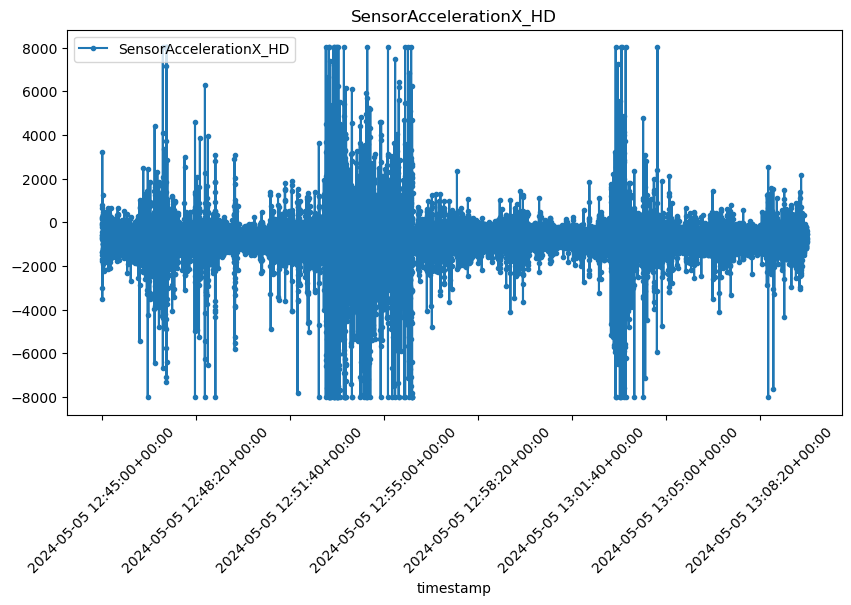

In [43]:
df_g.get_group(date(2024,5,5))[:37500].plot(x='timestamp', y=ACC_COLS[0],title=ACC_COLS[0], figsize=[10,5], rot=45, style='.-')

<Axes: title={'center': 'SensorAccelerationY_HD'}, xlabel='timestamp'>

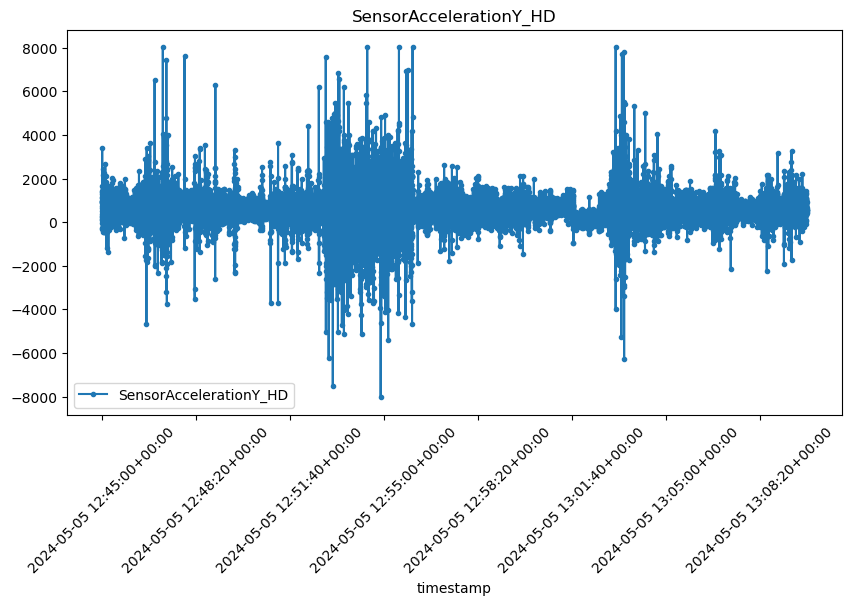

In [41]:
df_g.get_group(date(2024,5,5))[:37500].plot(x='timestamp', y=ACC_COLS[1], title=ACC_COLS[1], figsize=[10,5], rot=45, style='.-')

<Axes: title={'center': 'SensorAccelerationZ_HD'}, xlabel='timestamp'>

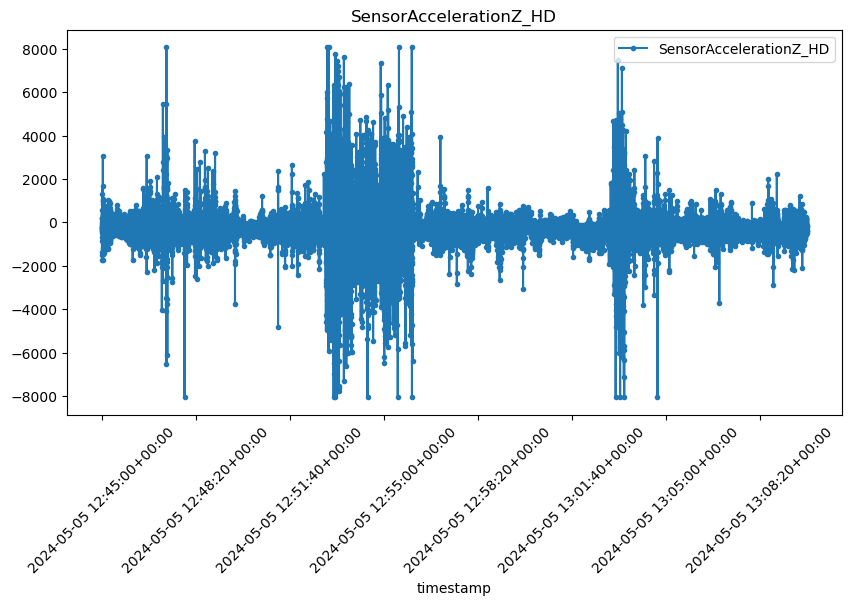

In [44]:
df_g.get_group(date(2024,5,5))[:37500].plot(x='timestamp', y=ACC_COLS[2],title=ACC_COLS[2], figsize=[10,5], rot=45, style='.-')